### PCA
Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. 
First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.
Scikit-Learn’s PCA classes take care of centering the data.

#### PCA uses singular value decomposition:
- step 0: plot the data
- step 1: get the center of the data
- step 2: shift the center to the plot center (0,0)
- step 3: start a random line that goes through the origin
- step 4: minimize the distance between a dot and the line
- step 5: the line is called PC1: a linear combinator of variables
- step 6: PC 2 is perpendicular to PC1
- step 7: rotate PC1 and PC2 so that PC2 is vertical and PC1 is horizontal

This process called Singular Value Decomposition 

#### Terminology: 
- The % of variables that consist of the PC 1 called Loading Score. 
- PC1 Variation = SS(distances for PC1)/(n-1)
- PC2 Variation = SS(distances for PC2)/(n-1)
- Total variation around PCs = PC1+PC2
- Scree plot: % of variations that each PC accounts for. 

In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
 
#########################
#
# Data Generation Code
#
#########################
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

print(data.head())
print(data.shape)


       wt1  wt2   wt3   wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  152  163   147   179  142  599  597  572  652  605
gene2  988  958  1040  1015  967  771  734  815  800  844
gene3  930  962   879   934  933   58   49   62   53   52
gene4  872  862   912   859  894  880  924  914  931  871
gene5  511  547   513   514  546  266  239  258  250  237
(100, 10)


In [3]:
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
scaled_data = preprocessing.scale(data.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

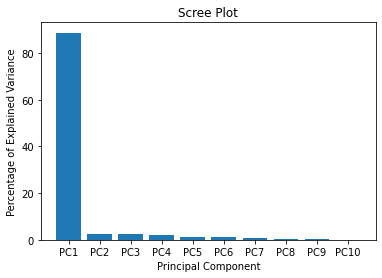

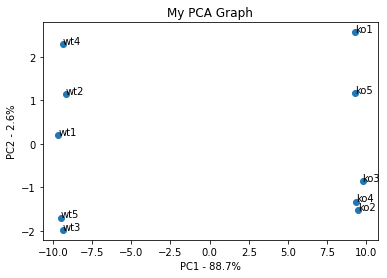

In [4]:
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()


In [5]:
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene46    0.106148
gene72    0.106141
gene36   -0.106124
gene14    0.106103
gene38    0.106096
gene17   -0.106068
gene55    0.106060
gene3    -0.106056
gene30    0.106054
gene84   -0.106039
dtype: float64
